<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Управляющий-музеями." data-toc-modified-id="Управляющий-музеями.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Управляющий музеями.</a></span></li><li><span><a href="#Создание-игры." data-toc-modified-id="Создание-игры.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание игры.</a></span></li><li><span><a href="#Сладости-в-данных." data-toc-modified-id="Сладости-в-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сладости в данных.</a></span></li><li><span><a href="#Знаменитые-Ирисы." data-toc-modified-id="Знаменитые-Ирисы.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Знаменитые Ирисы.</a></span></li></ul></div>

**HomeTask**

**Лекция 7. Визуализация на Python**

Выполните задания используя данный Notebook.ipynb. Домашнее задание предоставляется вместе с набором учебных датасетов. 
Перед началом, пожалуйста, убедитесь, что все необходимые датасеты находятся в одной папке с данным Notebook.

Следуйте поэтапно (по параграфам) данного ноутбука и заполняйте пропуски необходимым кодом для визуализации, чтобы ответить на соответствующие вопросы:
- `<your code here>` - для реализации кода (убедитесь, что код выполняется без ошибок)  
- `<your answer>` - для текстового ответа

Пожалуйста, **продублируйте ответы кратко в форме на my.tinkoff.ru/edu** - это позволит быстрее проверить вашу работу. Также **прикрепите код вашего ноутбука в формате .py** - в случае вопросов, преподаватель сможет детально посмотреть ваш код.

### Управляющий музеями. 

В вашем распоряжении данные о посещении 4 музеев. Для внеочереднего заседания, вам необходимо предоставить отчёт и ответить на следующие вопросы:

In [1]:
import pandas as pd
import seaborn as sns

# загрузка данных для task № 1. Посмотрим на данные
museum_visitors = pd.read_csv('museum_visitors.csv', sep = ',')
museum_visitors.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [2]:
# 1. В октябре 2018 года на сколько посетителей больше посетило Avila Adobe, чем Firehouse Museum?
# <your code here>
museum_visitors['Date'] = pd.to_datetime(museum_visitors['Date'])

oct_18 = museum_visitors[museum_visitors['Date'].dt.month == 10]
oct_18 = oct_18[oct_18['Date'].dt.year == 2018]
oct_18['Avila Adobe'].values[0]-oct_18['Firehouse Museum'].values[0]

14658

1. В октябре 2018 года на сколько посетителей больше посетило Avila Adobe, чем Firehouse Museum?

**Ответ:** 14658

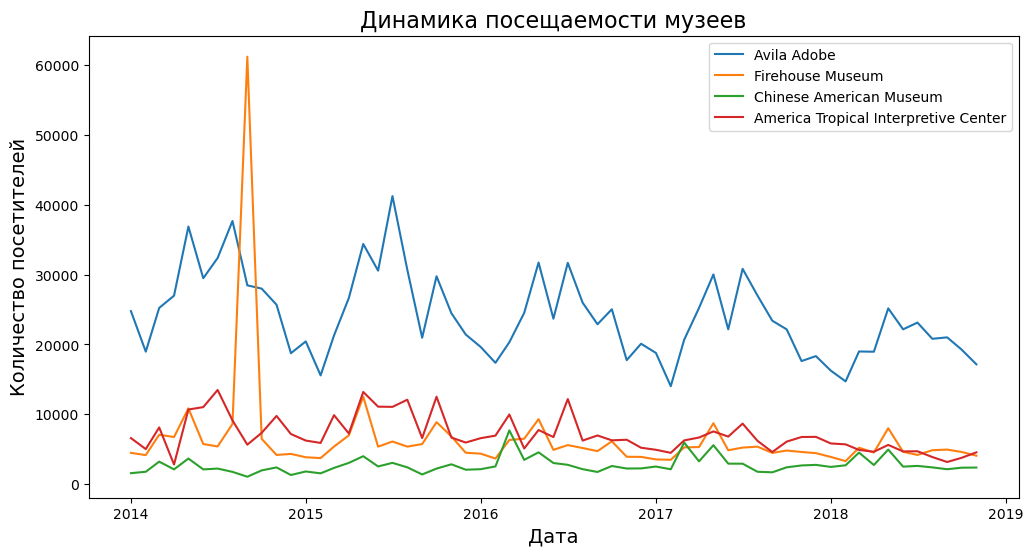

In [3]:
# Некий музей утверждает, что в 2014 году они провели мероприятие, 
# которое привлекло невероятное количество посетителей, и что им следует получить дополнительный бюджет 
# для проведения подобного мероприятия снова. 

# Другие музеи считают, что такие мероприятия не так уж важны, и бюджеты должны быть разделены исключительно 
# на основе недавних посетителей в среднем за месяц.

# Чтобы показать, как мероприятие соотносится с обычным трафиком в каждом музее, создайте необходимую диаграмму (какую?), 
# которая показывает, как количество посетителей каждого музея менялось с течением времени. 

#  <your code here>
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.figure(figsize=(12, 6)) 
sns.lineplot(x='Date', y='Avila Adobe', data=museum_visitors, label='Avila Adobe')
sns.lineplot(x='Date', y='Firehouse Museum', data=museum_visitors, label='Firehouse Museum')
sns.lineplot(x='Date', y='Chinese American Museum', data=museum_visitors, label='Chinese American Museum')
sns.lineplot(x='Date', y='America Tropical Interpretive Center', data=museum_visitors, label='America Tropical Interpretive Center')

plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество посетителей', fontsize=14)
plt.title('Динамика посещаемости музеев', fontsize=16)
plt.legend()
plt.show()


2. Какой график вы выберете для визуализации ежемесячного трафика музеев? 

**Ответ:** Line Plot (линейный график) — классический способ отображения данных во времени.

3. Исходя из этого графика, какой музей проводил мероприятие по привлечению посетителей? 

**Ответ:** Firehouse Museum (судя по рекордному уникальному значению посетителей для него)

4. Исходя из этого графика, какой музей обладает выраженной сезонностью посещения? 

**Ответ:** Наиболее выражена сезонность у Avila Adobe (спад зимой, пик - летом, видны сезонные две вершины)

### Создание игры. 

Ваши друзья решили создать свою собственную видеоигру! Вы - как аналитик данных, решили помочь ребятам. IGN Game Reviews собирает данные обо всех последних игровых релизах, а также о рейтинге, который они получили от экспертов, от 0 (катастрофа) до 10 (шедевр).

Вы решили использовать обзоры IGN для рекомендации дизайна будущей игры. К счастью, рейтинг уже обобщён в CSV-файле:

In [4]:
# загрузка данных для task № 2. Посмотрим на данные
ign_data = pd.read_csv('ign_scores.csv', index_col = 'Platform', sep = ',')
ign_data.head()
#  <your code here>
max_pc_score = ign_data.loc['PC'].max()

print(max_pc_score, ign_data.loc['PC'].idxmax())


7.759930313588847 RPG


1. Какую самую высокую среднюю оценку получили игры для ПК (для любого жанра)?

**Ответ:** 7.759930313588847   (жанром оказался RPG)

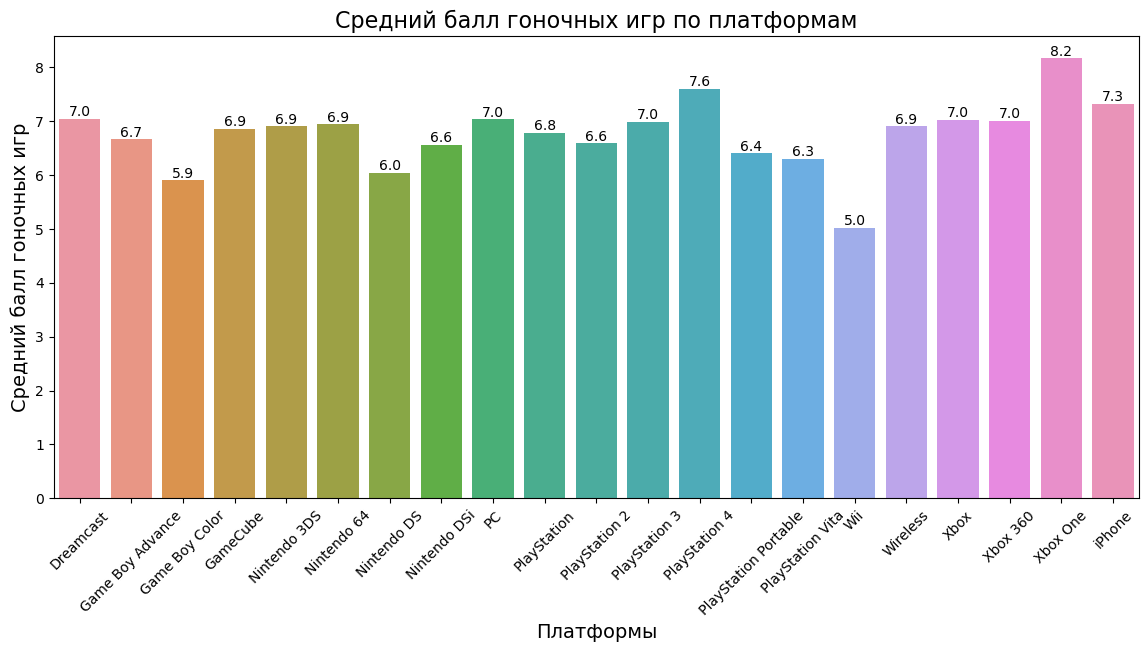

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px 
# Гоночная игра Mario Kart Wii, выпущенная для платформы Wii в 2008 году - отличная игра
# Её рейтинг составляет колоссальные 8,9! Вдохновленные успехом этой игры, вы подумываете о собственной гоночной игре
# для платформы Wii.

# Создайте столбчатую диаграмму (barplot), которая показывает средний балл гоночных игр для каждой платформы. 
# Ваша диаграмма должна иметь по одному столбцу для каждой платформы.

#  <your code here>
plt.figure(figsize=(14, 6)) 
graphic = sns.barplot(x=ign_data.index, y=ign_data['Racing'], data=ign_data)
graphic.bar_label(graphic.containers[0], fmt='%.1f', label_type='edge')
plt.xlabel('Платформы', fontsize=14)
plt.ylabel('Средний балл гоночных игр', fontsize=14)
plt.title('Средний балл гоночных игр по платформам', fontsize=16)
plt.xticks(rotation=45)
plt.show()

2. На основе столбчатой диаграммы, ожидаете ли вы, что гоночная игра для платформы Wii получит высокий рейтинг? Если нет, то какая игровая платформа кажется лучшей альтернативой?

**Ответ:** Нет, не ожидаю (средний балл гоночных игр на ней самый низкий), лучшей альтернативой выглядит платформа Xbox One (у нее наивысший средний балл гоночных игр)

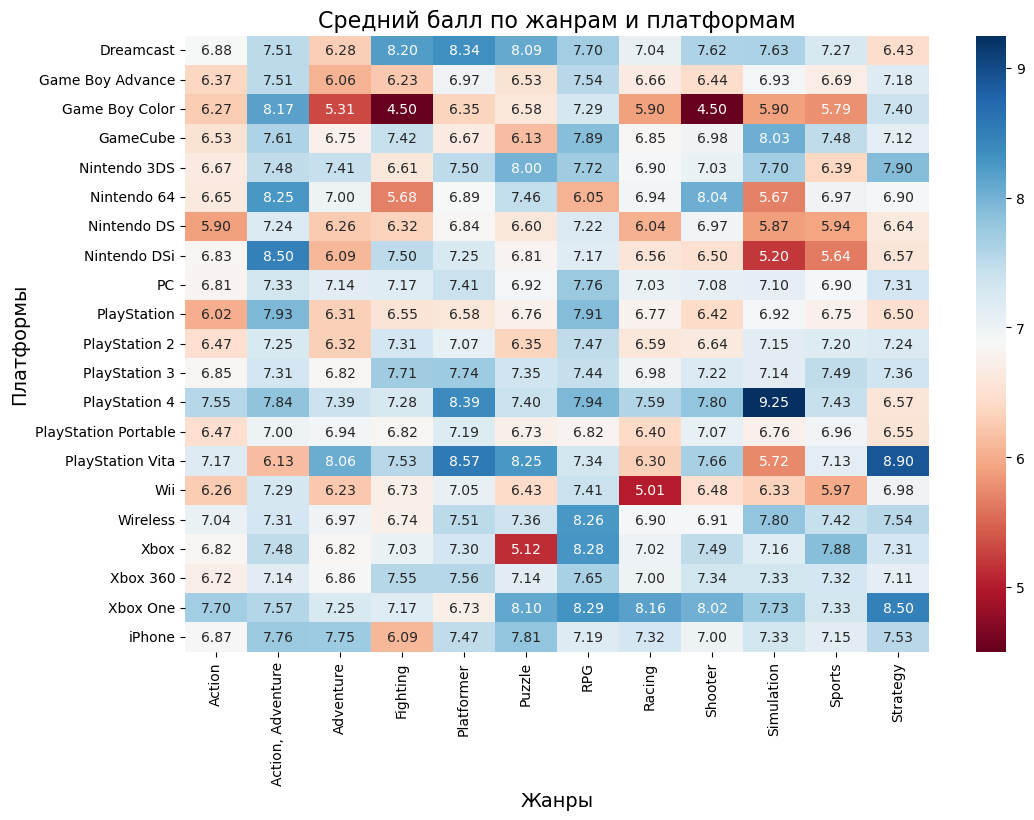

Средний рейтинг для Fighting на Game Boy Color: 4.5
Средний рейтинг для Shooter на Game Boy Color: 4.5


In [6]:
# В конце концов, вы решаете не создавать гоночную игру для Wii
# Вы решаете использовать всевозможные данные IGN, чтобы определиться с новым выбором жанра и платформы.

# Используйте данные для создания тепловой карты среднего балла по жанру и платформе. (для sns.heatmap исп. доп. annot = True)
#  <your code here>

plt.figure(figsize=(12, 8))  
sns.heatmap(ign_data, annot=True, cmap='RdBu', fmt='.2f')
plt.xlabel('Жанры', fontsize=14)
plt.ylabel('Платформы', fontsize=14)
plt.title('Средний балл по жанрам и платформам', fontsize=16)
plt.show()

#на графике при отрисовке видно, что два минимума, но чтобы не залезать отдельно в таблицу
#или формат делать до 10 знаков после запятой, то есть не использовать примитивные костыли, 
#которые только ухудшат картинку, выведем, посмотрев на график, эти два значения (потом увидим их идентичность)
mean_score = ign_data.loc['Game Boy Color', 'Fighting']
print(f"Средний рейтинг для Fighting на Game Boy Color: {mean_score:}")
mean_score = ign_data.loc['Game Boy Color', 'Shooter']
print(f"Средний рейтинг для Shooter на Game Boy Color: {mean_score:}")

3. Какая комбинация жанра и платформы получает самые высокие средние оценки?

**Ответ:** Simulation + PlayStation4 (рейтинг 9.25 округленно)


4. А какая комбинация получает самые низкие средние оценки?

**Ответ:** Fighting + Game Boy Color и Shooter + Game Boy  (рейтинг по 4.5)

### Сладости в данных.

Вы работаете на крупного производителя сладостей, и ваша цель — написать отчет, который ваша компания может использовать для разработки своего следующего продукта. Вскоре после начала исследования вы натыкаетесь на этот очень интересный набор данных, содержащий результаты опроса по потреблению любимых сладостей.

In [7]:
# загрузка данных для task № 3. Посмотрим на данные
candy_data = pd.read_csv('candy.csv', index_col = 'id', sep = ',')
candy_data.head()
#  <your code here>

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


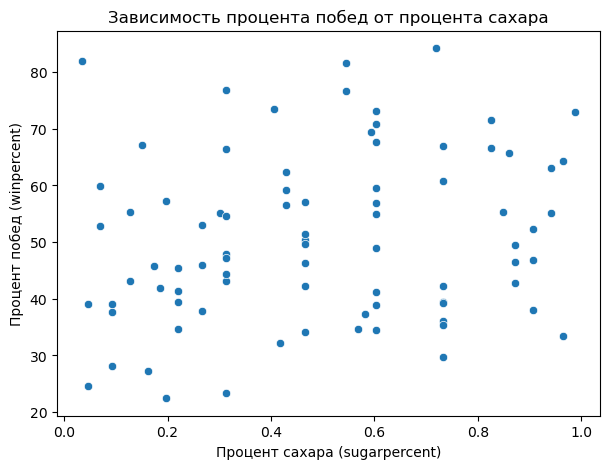

In [8]:
# Чем больше сахара - тем вкуснее?

# Создайте диаграмму рассеяния (scatter plot), которая показывает связь между «sugarpercent» (на горизонтальной оси x)
# и «winpercent» (на вертикальной оси y).

#  <your code here>
plt.figure(figsize=(7, 5))
sns.scatterplot(x='sugarpercent', y='winpercent', data=candy_data)
plt.xlabel('Процент сахара (sugarpercent)')
plt.ylabel('Процент побед (winpercent)')
plt.title('Зависимость процента побед от процента сахара')
plt.show()

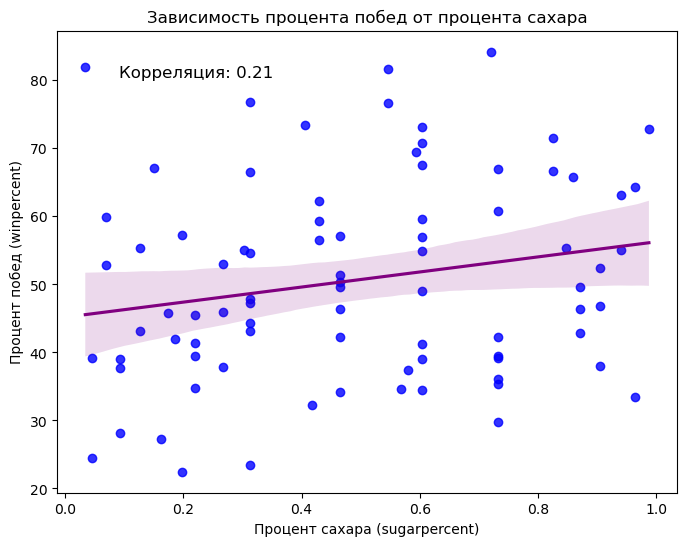

In [9]:
# Похоже, что только диаграммы рассеяния недостаточно, давайте построим её с линией регресси (regplot).
# Согласно графику который вы получите, есть ли небольшая корреляция между 'winpercent' и 'sugarpercent'? 
# Что это говорит вам о конфетах, которые люди предпочитают?

#  <your code here>
correlation = candy_data['sugarpercent'].corr(candy_data['winpercent']) #найдем корреляцию 

plt.figure(figsize=(8, 6))
sns.regplot(x='sugarpercent', y='winpercent', data=candy_data, scatter_kws={'color': 'blue'}, line_kws={'color': 'purple'})
plt.xlabel('Процент сахара (sugarpercent)')
plt.ylabel('Процент побед (winpercent)')
plt.title('Зависимость процента побед от процента сахара')

#выведем значение корреляции на графике
plt.text(0.1, 0.9, f'Корреляция: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12)


plt.show()

1. Ответьте в свободном формате, на основании построенных графиков: **есть ли какая-то связь между предпочтениями покупателей и количеством сахара в сладостях?**

**Ответ:** наблюдается слабая положительная корреляция между процентом сахара (sugarpercent) и процентом побед (winpercent). Это означает, что покупатели обычно предпочитают сладости с б0льшим содержанием сахара. Однако корреляция невысокая и виден сильный разброс данных. Например, для доли сахара больше 0.8 нет таких же высоких значений winpercent, как это наблюдалось от 0.5 до 0.8. Это говорит о том, что другие факторы тоже влияют на выбор покупателя и процент сахара не является сильно доминирующим, показывающим зависимость. (и визуально не заметен общий тренд, группировка данных)


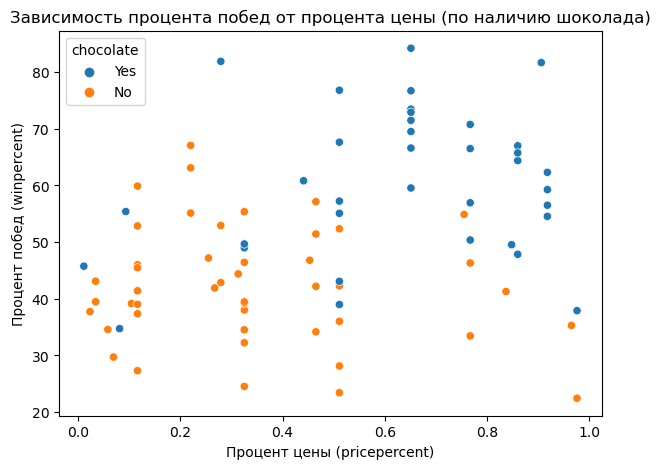

In [10]:
# Ниже создайте диаграмму рассеяния, чтобы показать связь между «pricepercent» (на горизонтальной оси x) 
# и «winpercent» (на вертикальной оси y). Используйте столбец «chocolate» для цветовой кодировки точек.

#  <your code here>

plt.figure(figsize=(7, 5))
sns.scatterplot(x='pricepercent', y='winpercent', data=candy_data, hue='chocolate')
plt.xlabel('Процент цены (pricepercent)')
plt.ylabel('Процент побед (winpercent)')
plt.title('Зависимость процента побед от процента цены (по наличию шоколада)')
plt.show()

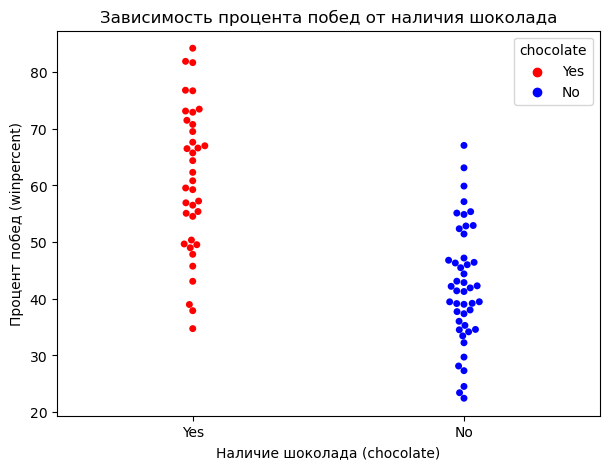

In [11]:
# Теперь давайте построим категориальную диаграмму рассеяния (график роя - swarmplot), 
# чтобы подчеркнуть связь между «chocolate» и «winpercent». 
# Поместите «chocolate» на (горизонтальную) ось x, а «winpercent» на (вертикальную) ось y.

#  <your code here>

plt.figure(figsize=(7, 5))
sns.swarmplot(x='chocolate', y='winpercent', data=candy_data, hue='chocolate', palette=['red', 'blue']) 
plt.xlabel('Наличие шоколада (chocolate)')
plt.ylabel('Процент побед (winpercent)')
plt.title('Зависимость процента побед от наличия шоколада')
plt.show()

2. Ответьте в свободном формате, на основании построенных графиков: **Как наличие шоколада влияет на предпочтения покупателей? Какой график лучше характеризует это: swarmplot или scatter plot?**

**Ответ:** Предпочтения покупатели в среднем чаще отдают сладостям с шоколадом. Однако разброс по предпочтениям покупателей большой вне зависимости от наличия шоколада. Однако максимальные значения по winpercent достигают сладости именно с наличием шоколада, а наихудших показателей достигает противоположная группа. Можно сказать, что сладости с шоколадом менее рискованные по сравнению с отсутствием его для максимизации winpercent.
swarmplot и scatterplot отражают разные зависимости (на одном переменная pricepercent+ наличие шоколада как индикатор, на другом -- только шоколад соответственно), scatterplot дает лишнюю в данном вопросе информацию и мешает анализировать влияние наличия шоколада на winpercent, однако он более информативный в целом. Swarmplot дает только нужную информацию, показывает разделение на группы и представляет собой относительно наиболее простой тип визуализации для анализа данного вопроса.

### Знаменитые Ирисы.

В набор представленных датасетов содержится показательный набор данных о замерах геометрических размеров Ирисов различных видов:
- Iris setosa
- Iris versicolor
- Iris virginica

Найдите датасет iris.csv и импортируйте для анализа в dataframe. Используйте любые графики для визуализации, чтобы ответить на вопрос:

- *Какой вид Ирисов можно определить (отделить от других видов) используя всего лишь один параметр? (и какой параметр)*

In [12]:
#  <your code here>
iris_data = pd.read_csv('iris.csv',sep=',')

iris_data.head()


,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
def plot_creator(feature):
    plt.figure(figsize=(12, 6))

    #boxplot
    plt.subplot(1, 2, 1)  # 1 строка 2 столбца позиция номер 1
    sns.boxplot(x='Species', y=feature, data=iris_data)
    plt.xlabel('Вид Ириса', fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.title(f'Зависимость между видом и {feature}', fontsize=16)

    #swarmplot
    plt.subplot(1, 2, 2)  # позиция номер 2
    sns.swarmplot(x='Species', y=feature, data=iris_data)
    plt.xlabel('Вид Ириса', fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.title(f'Зависимость между видом и {feature}', fontsize=16)

    plt.tight_layout()
    plt.show()

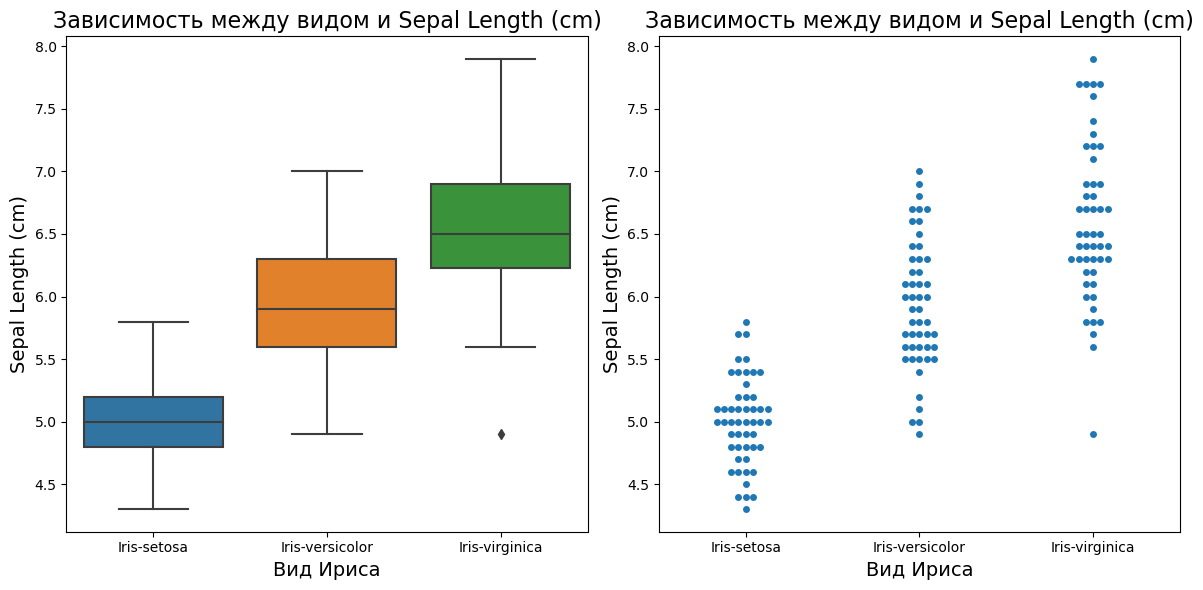

In [14]:
plot_creator('Sepal Length (cm)')

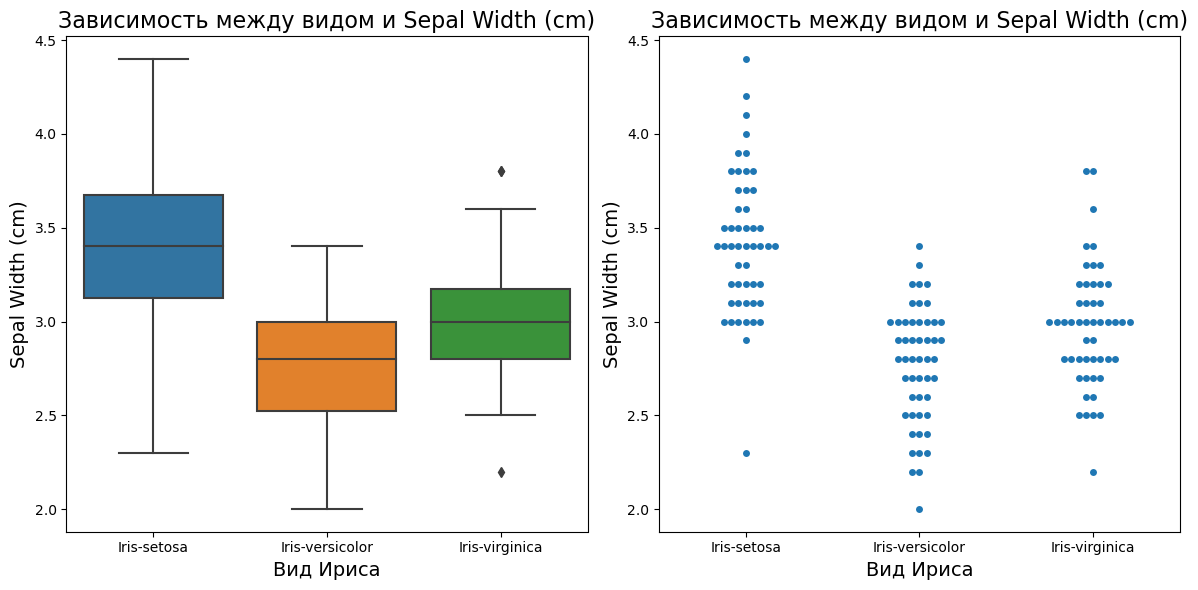

In [15]:
plot_creator('Sepal Width (cm)')

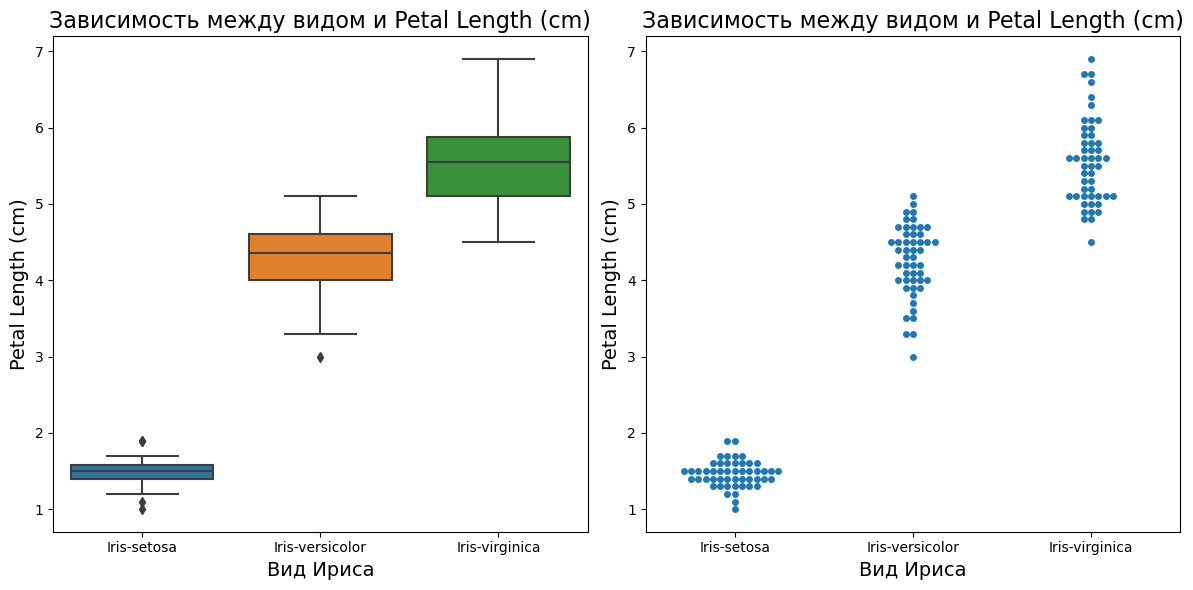

In [16]:
plot_creator('Petal Length (cm)')

Text(0.5, 1.0, 'Зависимость между видом и Petal Width (cm)')

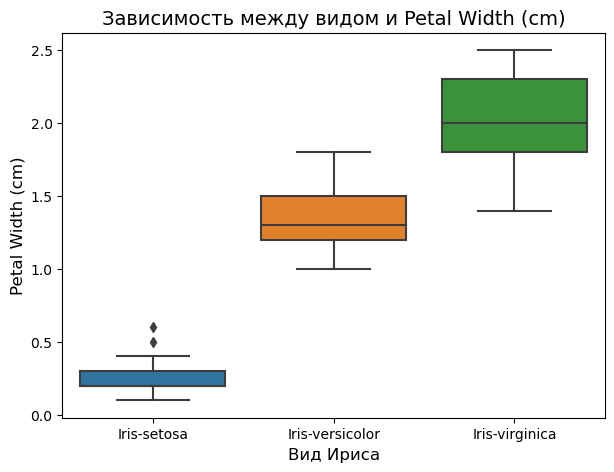

In [17]:
#точки в заданных настройках не умещаются для 4 вида, поэтому построим для него отдельно
plt.figure(figsize=(7, 5))
#boxplot
sns.boxplot(x='Species', y='Petal Width (cm)', data=iris_data)
plt.xlabel('Вид Ириса',fontsize=12)
plt.ylabel('Petal Width (cm)',fontsize=12)
plt.title(f'Зависимость между видом и Petal Width (cm)',fontsize=14)

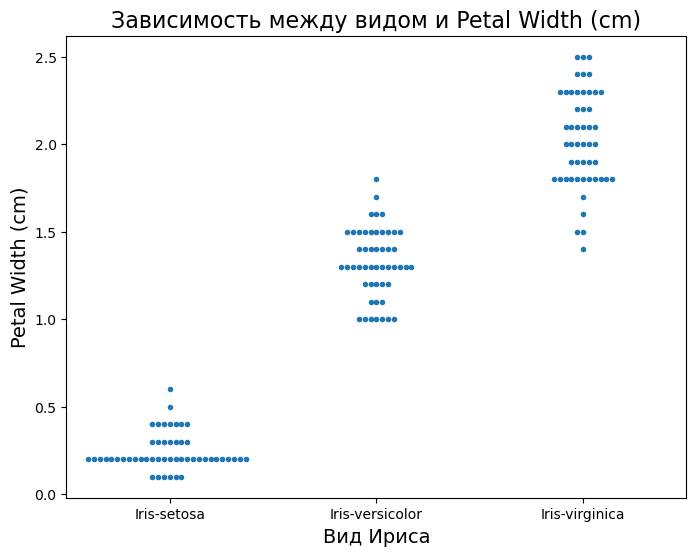

In [18]:
#swarmplot
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Species', y='Petal Width (cm)', data=iris_data, size=4)
plt.xlabel('Вид Ириса', fontsize=14)
plt.ylabel('Petal Width (cm)', fontsize=14)
plt.title(f'Зависимость между видом и Petal Width (cm)', fontsize=16)
plt.show()

Видно, что по Sepal Length (cm) и Sepal Width (cm) нельзя однозначно выделить вид Ирисов. По Petal Length (cm) можно
однозначно отделить Iris-setosa (значение для него не превышает 2, а для других сторого больше), а другие два вида тяжело 
отличить по этому признаку. По Petal Width (cm) тоже Iris-setosa однозначно определяется (значение меньше 0.75), 
другие два вида тяжело отличить, но видно, что при значениях больше 1.6 Iris-versicolor маловероятен, а при значениях 
меньше 1.8 уже Iris-virginica маловероятен. 
Таким образом, подходят для однозначной отделимости вида Iris-setosa признаки Petal Width (cm) и Petal Length (cm)